# Prosper Loan Data Exploration


## by Fatin Shariff

## Investigation Overview

I am interested in the features that could help in predicting the outcome of the loan status especially the defaulted and charged off loan. The next point that I am going to explore is how prosper rating affecting other loan features.

## Dataset Overview

This raw data set contains 113,937 loans with 81 variables. For this investigation I have narrowed this data set to  113058 loans with 13 features after dropping duplicates and 8 of inconsistent data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_raw=pd.read_csv('prosperLoanData.csv')
loan=loan_raw.drop_duplicates(subset= ['ListingKey','ListingNumber','ListingCreationDate'],keep='first')




In [3]:
columns_loan=['Term', 'LoanStatus', 'BorrowerAPR','LenderYield','EstimatedLoss',
              'EstimatedReturn', 'ProsperRating (numeric)','ProsperRating (Alpha)',
              'ListingCategory (numeric)','DebtToIncomeRatio',
              'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

In [4]:
# narrow the dataset with interested variables
loan=loan.loc[:,columns_loan]
loan.sample(10)

,Term,LoanStatus,BorrowerAPR,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
40168,36,Completed,0.23748,0.2100,NaN,NaN,NaN,NaN,0,0.33000,3646.750000,8000,309.68
23275,36,Current,0.08577,0.0624,0.0074,0.05440,7.0,AA,1,0.07000,6666.666667,4000,123.95
35453,36,Current,0.33215,0.2825,0.1475,0.10941,2.0,E,1,0.14000,4250.000000,3900,163.96
81353,36,Current,0.14348,0.1053,0.0324,0.06910,6.0,A,1,0.36000,8333.333333,10000,329.90
72472,36,Completed,0.10867,0.0950,NaN,NaN,NaN,NaN,0,0.12957,6183.333333,2000,64.53
25680,36,Completed,0.20210,0.1700,NaN,NaN,NaN,NaN,1,0.15000,4583.333333,6000,216.91
49551,12,Completed,0.12458,0.0773,0.0324,0.04200,6.0,A,1,0.22000,10666.666667,8000,698.61
47309,36,Current,0.12020,0.0824,0.0224,0.05780,6.0,A,1,0.31000,4583.333333,10000,319.12
101870,36,Chargedoff,0.16617,0.1540,NaN,NaN,NaN,NaN,0,0.11000,12083.333333,5000,175.54
103327,36,Completed,0.17170,0.1400,NaN,NaN,NaN,NaN,4,0.22000,6750.000000,3001,104.03


In [5]:
# convert ProsperRating (Alpha) into ordered categorical types
rating_order = ['AA','A','B','C','D','E','HR']

ordered_rating = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = rating_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_rating)

In [6]:
#remove unconsistent data
loan=loan[loan.StatedMonthlyIncome<200000]

## Distribution of Loan Status

We can see there are 38058 completed loans and 11991 charged off ones. There are 5018 defaulted loan and small numbers of past due loans. Investigation will be conducted to defaulted,charged off and completed loans only.

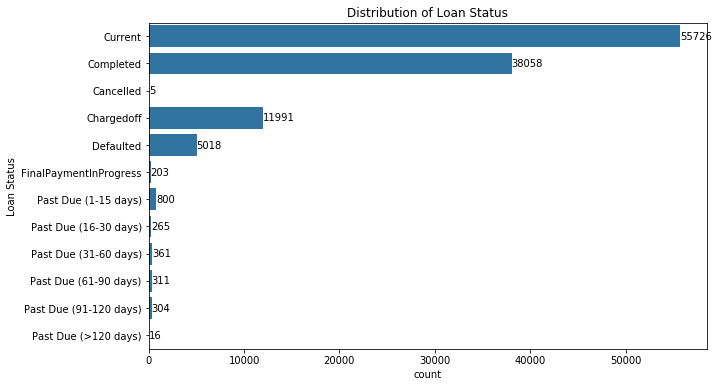

In [19]:
base_color=sb.color_palette()[0]
Status_order=['Current','Completed','Cancelled','Chargedoff', 'Defaulted', 'FinalPaymentInProgress',
            'Past Due (1-15 days)',  'Past Due (16-30 days)','Past Due (31-60 days)',
            'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']

plt.figure(figsize=[10, 6])
sb.countplot(data = loan, y = 'LoanStatus',color=base_color,order=Status_order)
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Status')

# add annotations

status_counts = loan['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = status_counts[label.get_text()]
    pct_string = '{:0.0f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(count+5,loc, pct_string, va = 'center')

## Distribution of Prosper Rating (Alpha)

The distribution shows the counts for each risk level starting from the lowest risk(AA) to the highest risk(HR). The distribution is quite symmetrical with the highest count in the middle for the medium risk borrower(C). The AA rating borrower are the least borrower category in this dataset with the second lowest in the highest risk category.

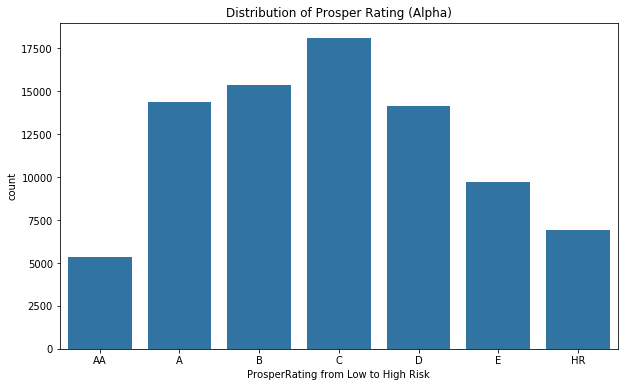

In [20]:
plt.figure(figsize=[10,6])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)',color=base_color)
plt.xlabel('ProsperRating from Low to High Risk')
plt.title('Distribution of Prosper Rating (Alpha)');

## Distribution of Stated Monthly Income

The monthly income in the dataset take on a very large range of values and are capped at 200k per month. Plotted on a logarithmic scale, the distribution of stated monthly income has a long right tail with the highest frequency for income less than 20k per month.

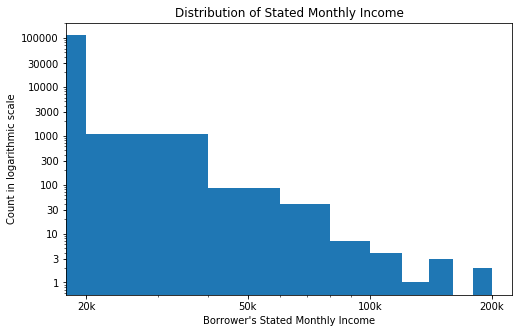

In [21]:
binsize =20000
bins = np.arange(0, loan['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome',bins=bins)
plt.yscale('log')
plt.xscale('log')
yticks= [1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks([2e4, 5e4, 1e5,2e5], ['20k','50k','100k','200k'])
plt.yticks(yticks,yticks)
plt.xlabel('Borrower\'s Stated Monthly Income')
plt.ylabel('Count in logarithmic scale')
plt.title('Distribution of Stated Monthly Income');

## Distribution of Debt to Income Ratio (DIR)

The distribution on DIR also takes on a large range of number and the plotted plot is transform to logarithmic scale. 
From the distribution, we can conclude that the debt to income ratio(DIR) are widely distributed. 75% of the borrower have DIR less than or equal to 32% and the rest have DIR more than 32% to 1001%.

The plot also shows that frequency decrease exponentially  until it reaches the value 10. The counts is less than 10 for debt to income ratio value between 6 to 10 and there is a sudden interesting spike in the frequency for the debt income ratio value of 10 and above. This could be mainly because this value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).


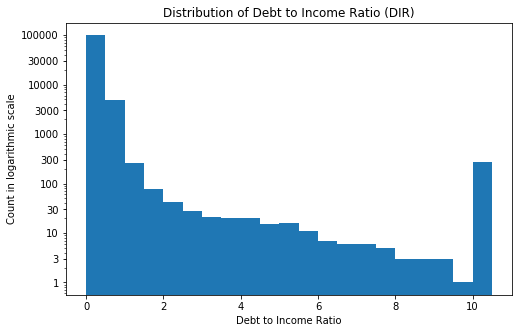

In [22]:
#dropping the NaN to avoid error when plotting histogram
loan_debt=loan.dropna(subset=['DebtToIncomeRatio'])

binsize = 0.5
bins = np.arange(0, loan_debt['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_debt, x = 'DebtToIncomeRatio',bins=bins)
plt.yscale('log')
yticks= [1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.yticks(yticks,yticks)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count in logarithmic scale')
plt.title('Distribution of Debt to Income Ratio (DIR)');


## Proportion of Loan Status vs. Prosper Rating

Plotting the proportion of completed, charged off and defaulted loan against each risk rating category for more fair comparison. This clustered bar chart show that for each group the completed loan has the highest percentage followed by charged off and then defaulted.

As the level of the risk increase from AA to HR, the percentage of the completed loan decrease while the charged off and defaulted loans increase with charged off having higher increase rate than defaulted.

This show the trend that higher risk borrower are more likely to be defaulted or charged off compare to lower risk borrower.

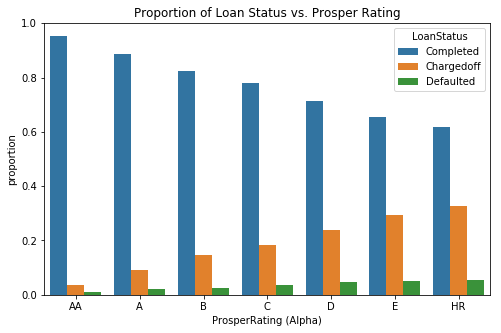

In [23]:
plt.figure(figsize = [8, 5])

x, y, hue = "ProsperRating (Alpha)", "proportion", "LoanStatus"
#hue_order = ["Completed", "Defaulted"]

(ComDefChar[hue]
 .groupby(ComDefChar[x])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue))

plt.title('Proportion of Loan Status vs. Prosper Rating');

## Stated Monthly Mean Income vs. Prosper Rating

It shows how the mean value of the monthly income of borrower in each risk level decrease as we move from lowest risk borrower to highest risk borrower.
The total range difference from highest risk and lowest risk in term of their stated monthly mean income is about 3000k.

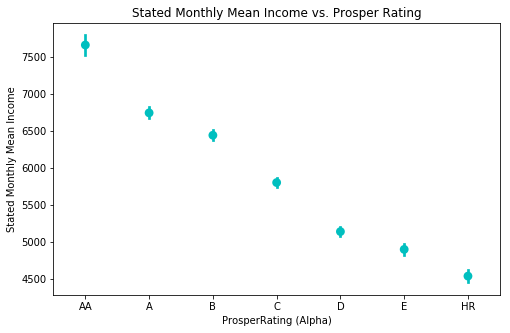

In [24]:
plt.figure(figsize = [8, 5])
sb.pointplot(data = loan, x='ProsperRating (Alpha)', y = 'StatedMonthlyIncome',color='c',linestyles=" ")
plt.ylabel('Stated Monthly Mean Income')
plt.title('Stated Monthly Mean Income vs. Prosper Rating');

## Prosper Rating and Loan Status by Monthly Mean Income and Mean Debt to Income Ratio

Both pointplots show both prosper rating and loan status correlated with stated monthly income and debt to income ratio. The overall trend show that when the borrower risk goes up starting from AA to HR, their stated monthly income decreases and their debt to income ratio increases.

In the left plot, the monthly mean income for  all risk rating show the same trend with completed loans having the highest monthly mean income, followed by charged off and defaulted loans. The range of the mean monthly income for charged off and defaulted decrease as the risk level increase.

While in the right plot, borrower that lead to defaulted loans have higher debt to income ratio for each risk rating. Even their DIR confidence interval for medium to high risk borrower is significantly large. The completed loan tends to have very small confidence interval of DIR comparing to charged off and defaulted loan for each risk rating. Borrower with high income and low DIR are more likely to complete the loan because they have more disposible income that could act as a buffer incase of emergency. Having high DIR especially for lower income borrower means they don't have this buffer incase emergency and are more incline to get loan defaulted. 


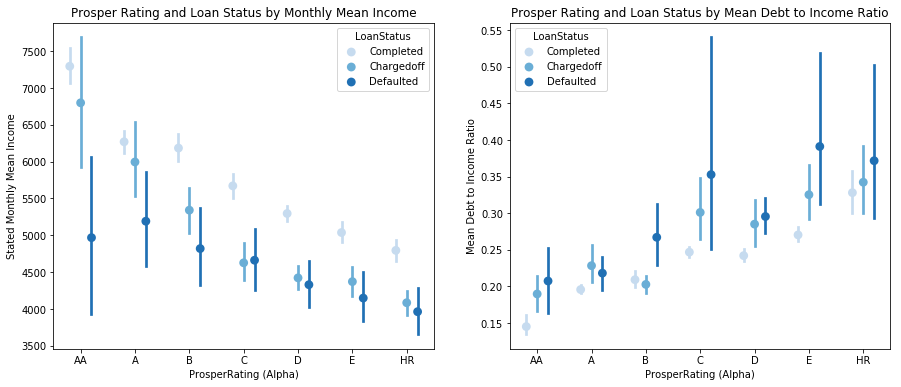

In [26]:
ComDefChar=loan[loan.LoanStatus.isin(['Completed','Defaulted','Chargedoff'])]

fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
status_order=['Completed','Chargedoff','Defaulted']
sb.pointplot(data = ComDefChar, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
             hue_order=status_order,palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_ylabel('Stated Monthly Mean Income')
ax[0].set_title('Prosper Rating and Loan Status by Monthly Mean Income')

sb.pointplot(data = ComDefChar, x = 'ProsperRating (Alpha)', y = 'DebtToIncomeRatio', hue = 'LoanStatus',
             hue_order=status_order,palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_ylabel('Mean Debt to Income Ratio')
ax[1].set_title('Prosper Rating and Loan Status by Mean Debt to Income Ratio');